<a href="https://colab.research.google.com/github/italocdantas/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Fran%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Paris, França*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade da França, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/france/ile-de-france/paris/2024-06-10/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id	int64
* name	object
* host_id	int64
* host_name	object
* neighbourhood_group	float64
* neighbourhood	object
* latitude	float64
* longitude	float64
* room_type	object
* price	float64
* minimum_nights	int64
* number_of_reviews	int64
* last_review	object
* reviews_per_month	float64
* calculated_host_listings_count	int64
* availability_365	int64
* number_of_reviews_ltm	int64
* license	object

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7241227,Appartement F2 de 50m2,23740469,Marie Josee,NaN,Buttes-Montmartre,48.889930,2.366960,Entire home/apt,NaN,365,2,2018-08-25,0.03,1,0,0,NaN
1,738818740125140768,Studette calme paris,33108376,Kaïs,NaN,Passy,48.852160,2.262300,Entire home/apt,NaN,4,6,2023-09-26,0.30,1,0,2,7511607442416
2,6640639,Chambre de Bonne,34756427,Ricardo,NaN,Vaugirard,48.831000,2.289190,Entire home/apt,NaN,365,0,NaN,NaN,1,0,0,NaN
3,8387171,Faidherbe Chaligny Square,44188365,Benoit,NaN,Reuilly,48.848980,2.386090,Entire home/apt,NaN,365,0,NaN,NaN,1,0,0,NaN
4,1097932353733680407,Beau studio au cœur de Barbès,514983472,Rebaia,NaN,Buttes-Montmartre,48.886598,2.359753,Entire home/apt,NaN,1,2,2024-04-07,0.59,1,0,2,7511808567461


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão resumida do Airbnb.
Podemos observar que ele possui a quantidade de: 95885 entradas e 18 variáveis

Na mesma página que baixamos o arquivo listing.csv. Há uma versão mais completa chamado: **listings.csv.gz**



In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variaveis:\t {}".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 95885
Variaveis:	 18


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 33% das linhas.
* A variáveL `host_name` têm aproximadamente 0,1% dos valores nulos.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
reviews_per_month,0.335694
last_review,0.335694
price,0.222204
license,0.206988
host_name,0.000083
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**
Para identificar a distribuição das variáveis, irei plotar o histograma

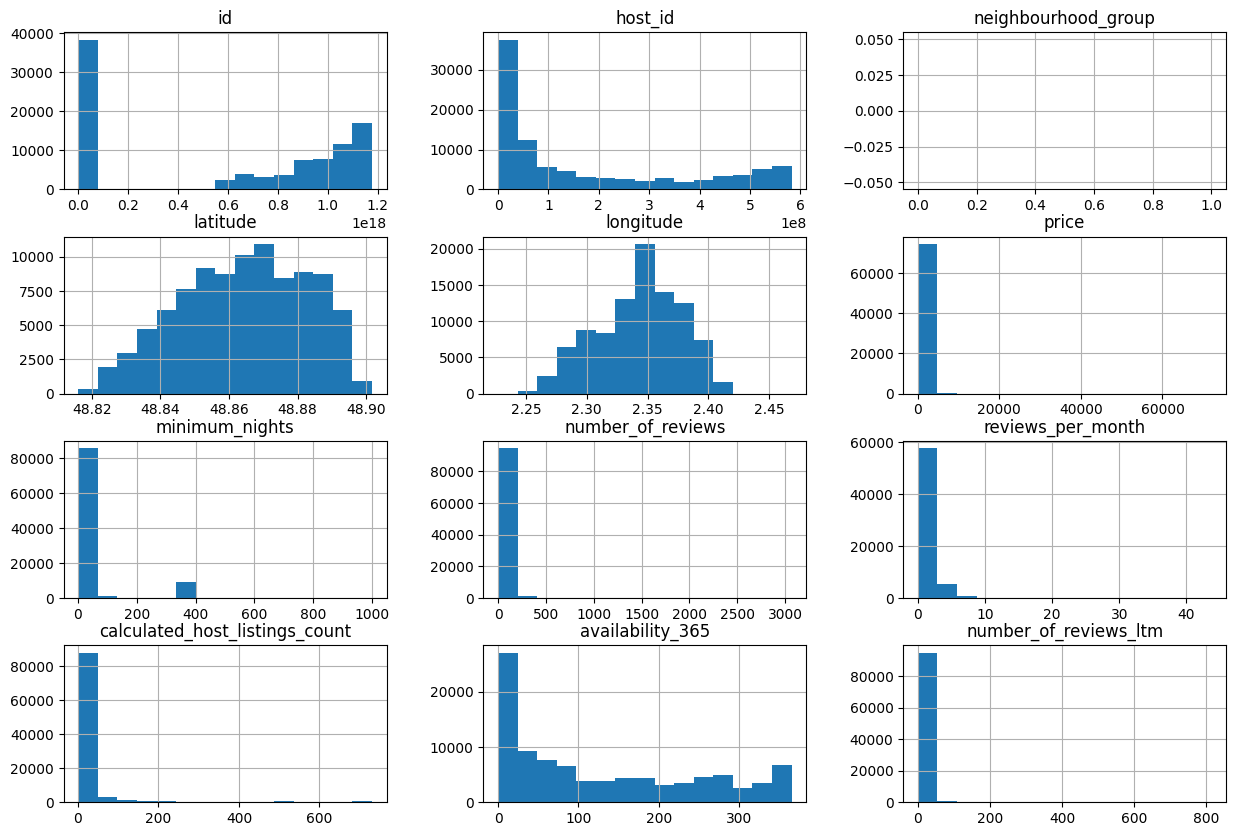

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Identificando *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,74579.000000,95885.000000,95885.000000,63697.000000,95885.000000,95885.000000
mean,289.075155,40.632539,19.888189,1.121445,21.602326,127.179966
std,684.010923,106.808557,52.040205,1.399308,84.659243,119.740013
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,109.000000,2.000000,0.000000,0.210000,1.000000,17.000000
50%,164.000000,3.000000,3.000000,0.650000,1.000000,88.000000
75%,290.000000,5.000000,18.000000,1.510000,2.000000,232.000000
max,72000.000000,1000.000000,3067.000000,43.720000,730.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 290, porém seu valor máximo é 72000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

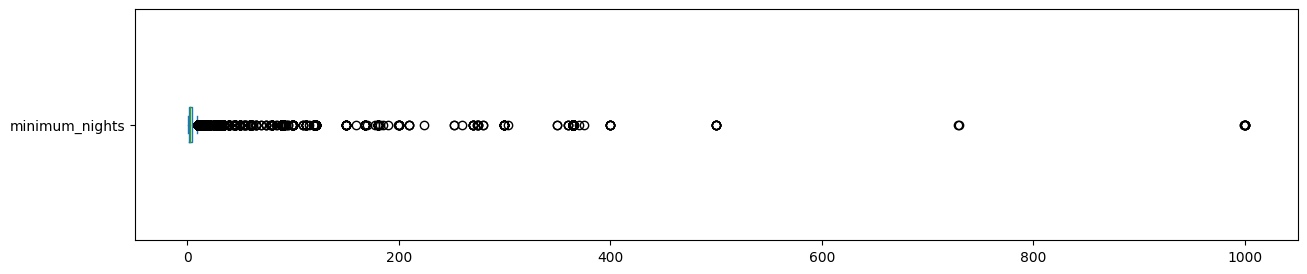

minimum_nights: valores acima de 30:
11090 entradas
Corresponde um total de 11.5659%


In [ ]:
# minimun_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("Corresponde um total de {:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print("Valor Médio no preço do aluguel:\t{}".format(df.price.mean()))

Valor Médio no preço do aluguel:	289.0751552045482


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação

# mostrar a matriz de correlação


In [ ]:
# plotar um heatmap a partir das correlações


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

## Conclusões
